# COGS 118A - Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Yuqi Zhang
- Yiling Cao
- Xiaolong Zhou

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- In addressing the need for automated music genre identification for enhanced user experience on music streaming platforms, we propose a machine learning approach to tackle genre classification and personalized music recommendation.
- Leveraging data features like tempo, rhythm, pitch, and lyrical content, our goal is to predict genre labels, a complex multiclass classification task that emulates the human ability to discern music genres. Concurrently, we aim to rank songs based on user preferences, transforming personalized music recommendation into an information retrieval task. Data used in this project will represent a variety of music genres and user listening habits, measured through both objective attributes of music and subjective user interactions.
- Machine learning algorithms will be utilized to make sense of this data, mapping musical features to genre labels and user preferences to song rankings.
- The performance of our genre prediction model will be gauged using standard classification metrics, such as accuracy, precision, recall, and F1-score, ensuring a quantitative measure of our success in mimicking the sensitive human ability to identify sound.

# Background
Music genre classification is a significant area of interest in digital music processing. The process involves extracting acoustic features of music, such as genre, rhythmic structure, harmonic content, duration, and the instruments played, using digital signal processing techniques. The classification plays a critical role in recommendation systems, audio libraries organization, and trend discovery<a name="ieee"></a>[<sup>[1]</sup>](#ieee)​.

Musical genres are human-made categories, defining different types of music based on shared features, including instrumentation, rhythmic structure, and harmonic content. These genre hierarchies help in managing the enormous volume of music available on the internet<a name="ssrn"></a>[<sup>[2]</sup>](#ssrn)​.

Various approaches, including Multiclass support vector machine, K-Nearest Neighbors, K-means clustering algorithm, and Convolutional neural network, are utilized in building music genre classification systems. The use of deep learning models, particularly convolutional neural networks, has gained popularity in automatic music genre classification, with a comparative study showing promising results against traditional classifiers<a name="raghav"></a>[<sup>[3]</sup>](#raghav).

Music recommendation systems are another crucial aspect of digital music platforms. These systems predict and push user preferences based on user behavior and music characteristics. The development of these algorithms has shifted from merely focusing on individual user preferences to incorporating mutual recommendations among users<a name="hindawi"></a>[<sup>[4]</sup>](#hindawi).

In summary, music genre identification and recommendation systems serve as essential components of digital music platforms, enhancing user experience by organizing music content and tailoring music selections to individual preferences. These systems leverage machine learning and deep learning methods to analyze music characteristics and user behavior, thereby enabling accurate genre classification and personalized music recommendations.

# Problem Statement

Human sound identify abbility is usually very sensitive. People usually identify a music genre "based on both objective and subjective measures"<a name="Lippens"></a>[<sup>[5]</sup>](#Lippens). When human subjectives is not possible to duplicate in machines, many music platforms still want machines to be able to identify such music genre as a source of feature preference. Music streaming platforms face two key challenges: accurate genre classification and personalized music recommendation. We propose to address these problems using machine learning. The genre prediction problem is a multiclass classification task, mapping input features (tempo, rhythm, pitch, lyrical content) to predefined genre labels. The recommendation problem can be defined as ranking songs based on user preferences, expressed as an information retrieval task. The problems can be mathematically defined and solved using ML algorithms. The genre prediction’s performance can be assessed using accuracy, precision, recall, and F1-score.

# Data
- Link: https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre
- Number of observations: 50005 Number of variables: 15
- An observation consist of:
    - instance_id: A unique identifier for each instance.
    - popularity: The popularity of the track.
    - acousticness: A measure of the acoustic quality of the track.
    - danceability: A measure of the danceability of the track.
    - duration_ms: The duration of the track in milliseconds.
    - energy: A measure of the energy of the track.
    - instrumentalness: A measure of the instrumentalness of the track.
    - key: The key of the track.
    - liveness: A measure of the liveness of the track.
    - loudness: The loudness of the track.
    - mode: The mode of the track (Major or Minor).
    - speechiness: A measure of the speechiness of the track.
    - tempo: The tempo of the track.
    - valence: A measure of the musical positiveness conveyed by a track.
    - music_genre: The genre of the music.
- Critical variables: 
    - music_genre: This is likely the target variable because we are building a model to predict the genre of a track based on its other characteristics.

    - acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, valence: These are all numerical features that describe different aspects of the track, which could be important predictors in a model.

    - key, mode: These are categorical features that could also be important, depending on the specific genre we are trying to predict.
- Ways to represent:
    - Numerical variables (popularity, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence) are represented as floating-point numbers.

    - Categorical variables (key, mode, music_genre) are represented as strings.

    - The instance_id is a unique identifier for each observation, represented as a floating-point number. 


# Set Up

In [1]:
# import pandas & numpy library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
sns.set_style("darkgrid")
sns.set_context("notebook")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Data Cleaning

In [3]:
path = "music_genre.csv"
music_data = pd.read_csv(path)

# Drop unrelated columns
music_data = music_data.drop(['artist_name', 'track_name', 'obtained_date'], axis=1)

# Replace missing values
music_data.replace(['?', -1], np.nan, inplace=True)

# Convert data types
music_data['duration_ms'] = music_data['duration_ms'].astype(float)
music_data['tempo'] = music_data['tempo'].astype(float)

# Standardize text data
music_data['key'] = music_data['key'].str.lower().str.strip()
music_data['mode'] = music_data['mode'].str.lower().str.strip()
music_data['music_genre'] = music_data['music_genre'].str.lower().str.strip()

music_data.dropna(inplace=True)

print(music_data.head())

   instance_id  popularity  acousticness  danceability  duration_ms  energy  \
1      46652.0        31.0       0.01270         0.622     218293.0   0.890   
2      30097.0        28.0       0.00306         0.620     215613.0   0.755   
3      62177.0        34.0       0.02540         0.774     166875.0   0.700   
4      24907.0        32.0       0.00465         0.638     222369.0   0.587   
6      43760.0        46.0       0.02890         0.572     214408.0   0.803   

   instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
1          0.950000   d     0.124    -7.043  minor       0.0300  115.002   
2          0.011800  g#     0.534    -4.617  major       0.0345  127.994   
3          0.002530  c#     0.157    -4.498  major       0.2390  128.014   
4          0.909000  f#     0.157    -6.266  major       0.0413  145.036   
6          0.000008   b     0.106    -4.294  major       0.3510  149.995   

   valence music_genre  
1    0.531  electronic  
2    0.333  electr

# Proposed Solution

By generating multiple music genre classification results using models such as neural network, KNN, and decision trees, we will maintain an accuracy percentage of our model to show how efficient such model can be with only subjective features we gained from the data. We have also tried implement sentimental data values from the dataset to try relate as close as possible to the true genre. These sentimental features are included as: popularity, acousticness, energy, intrumental, liveness, loudness, speechiness, tempo, valence. We might exclude "artist_name" and "track_name" since we want to focus on the element of a music genre as music it self instead of its title and author. For features such as key and mode, we will be doing one-hot-encoding to transform these categorical data to the same type as other features. As human, we are able to identify if such music is lively or not and base off that detect its genre. For this model, we want to simulate the same detection that our human can do toward the musics itself. We will be spliting our 50006 observations into train, valid, and test datasets. Using methods such as nested cross-validation would gave us accurate results from multiple different algorithm based models. We will be mainly observe a KNN and decision tree model by comparing and contrast each runtime and accuracy. We migh also need to do one-hot encoding since our labels are multiclass categorical. By tuning the parameters, we will find the best number of neighbors for KNN and best fitted tree depth and criterion for decision tree model. Idealy, a neural net model should be more accurate and widely used. However, with limited time and knowledge on neural networks, our team plan on test such algorithm model after we have a finite solution first. Our solution model can help our main project problem by providing a source to music platforms to quickly identify a genre when music data are being imported to the platform. It will also be helpful when the music platform tries to build a recommendation system and apply such model to help label what type of music is each user listening to. 

There is a benchmark model called "music_genre_classification" using Convolutional neural network(CNN) to perform music genre classification. [Link](https://github.com/ds7711/music_genre_classification/tree/master). This model has achieved an accuracy of 70%, which is comparable to the human accuracy. Such model can possiblly substitute human ears and identify music genres within 30 seconds of the music play. It will be more time saving and allow humans to apply their abilities on other fields with more time.

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

A mean accuracy from the nested cross validation would be the most desirable evaluation metrics that we will be using in this project. When we are doing a classification problem, we want to know how good is our model doing. In the benchmark model, the author provided their accuracy percentage on the test dataset. Our model first will classify test dataset music genres with the features only. Then we will take those labels accompany with the obervation ids to find whether or not the true label is the same as predicted label. Last, we will count up all the correct number of predicted labels and calculate the accuracy. The accuracy can be calculated using below formula: <br>
$
\begin{align}
x &= (x_1, ..., x_m), x_i \in \mathcal{R}^n, x \in \mathcal{R}^m \\
y & \in \mathcal{R}^{10}: \text{['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop']} \\
accuracy &= 1 - error \\
error &= \frac{1}{n}\sum^n_{i=1}1(y_i \neq f(x_i))\\
\end{align}$

Since we planning on using nested cross-validation, each iteration will contain a best accuracy. In order to compare algorithms to algorithms, for example KNN to decision tree, we have to average such accuracy in total iterations and compare them. So, we might need to do multiple cross-validations to ensure our model is working efficiently. 

# Preliminary results
Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



### Feature Selection

In [32]:
# Standardize numerical columns
numerical_cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
music_data[numerical_cols] = (music_data[numerical_cols] - music_data[numerical_cols].mean()) / music_data[numerical_cols].std()

# Perform one-hot encoding on the 'key' and 'mode' columns
df = pd.get_dummies(music_data, columns=['key', 'mode'])

# Exclude the 'music_genre' column from the feature selection
X = df.drop('music_genre', axis=1)
y = df['music_genre']

# Perform feature selection to select the top k features
k = 8  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support(indices=True)].tolist()

# Print the selected features
print("Selected Features:")
print(selected_feature_names)

Selected Features:
['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'valence']


In [33]:
#Update new X
selected_data = music_data[selected_feature_names]
X = selected_data
print(X.shape, y.shape)

(40560, 8) (40560,)


### Apply Decision Tree Model

In [47]:
model = DecisionTreeClassifier()

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Tuning
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

# Train a decision tree with the best parameters
dtc_best = DecisionTreeClassifier(**grid_search.best_params_)
dtc_best.fit(X_train, y_train)
y_pred_best = dtc_best.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

 alternative       0.28      0.28      0.28       797
       anime       0.61      0.62      0.62       827
       blues       0.38      0.40      0.39       792
   classical       0.77      0.74      0.76       821
     country       0.41      0.41      0.41       804
  electronic       0.47      0.44      0.46       843
     hip-hop       0.36      0.33      0.35       824
        jazz       0.38      0.40      0.39       782
         rap       0.31      0.33      0.32       782
        rock       0.40      0.38      0.39       840

    accuracy                           0.44      8112
   macro avg       0.44      0.44      0.44      8112
weighted avg       0.44      0.44      0.44      8112

Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
              precision    recall  f1-score   support

 alternative       0.39      0.32      0.35       797
       anime       0.71 

# Analysis for Decision Tree:
The overall accuracy improved from 44% to 52%, with all genres seeing an improvement in precision, recall, and F1-score. The most notable improvements were seen in the 'alternative', 'rap', and 'rock' genres. The best parameters identified were using 'entropy' as the criterion, a maximum depth of 10, a minimum of 4 samples per leaf, and a minimum of 10 samples to split an internal node. Despite this improvement, there is still room for better performance, especially in genres like 'alternative', 'hip-hop', and 'rap', suggesting the potential need for more data, feature engineering, different models, or further tuning.

# Apply Random Forest Model

In [7]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
RF_Model = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
RF_Model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = RF_Model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest Classifier
clf = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(RF_Model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Print the best score
print("Best score: ", grid_search.best_score_)

# Predict the response for test dataset using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 alternative       0.40      0.35      0.37       797
       anime       0.74      0.73      0.74       827
       blues       0.59      0.52      0.55       792
   classical       0.85      0.84      0.85       821
     country       0.57      0.57      0.57       804
  electronic       0.65      0.61      0.63       843
     hip-hop       0.35      0.36      0.35       824
        jazz       0.53      0.52      0.53       782
         rap       0.32      0.32      0.32       782
        rock       0.50      0.63      0.56       840

    accuracy                           0.55      8112
   macro avg       0.55      0.55      0.55      8112
weighted avg       0.55      0.55      0.55      8112

Best parameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best score:  0.5684168324681735
              precision    recall  f1-score   support

 alternative       0.44      0.34      0.39    

# Analysis for Random Forest:
Initially, the model achieved an overall accuracy of 55%, but after tuning the hyperparameters, the accuracy increased to 56%. The most impactful improvements were observed in the 'alternative' genre, where precision increased from 0.40 to 0.44, and the 'hip-hop' genre, where precision rose from 0.35 to 0.37. The 'rock' genre maintained a significant recall at 0.73, indicating that the model was effective at correctly identifying 'rock' songs. The best parameters identified were a maximum depth of None, minimum samples per leaf of 4, minimum samples to split an internal node of 10, and 200 estimators. The performance improvement, though not as substantial as in the previous example, indicates that hyperparameter tuning effectively enhanced the model's predictive accuracy. However, for genres like 'alternative', 'hip-hop', and 'rap', there's still potential for further improvement, suggesting additional data, feature engineering, different models, or further tuning might be beneficial.

In [33]:
# Create a Logistic Regression Classifier
LR_model = LogisticRegression()

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the training sets
LR_model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = LR_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Specifies the norm used in the penalization
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Train a Logistic Regression with the best parameters
lr_best = LogisticRegression(**grid_search.best_params_)
lr_best.fit(X_train, y_train)

# Predict the response for test dataset using the best model
y_pred_best = lr_best.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

 alternative       0.33      0.30      0.31       797
       anime       0.58      0.62      0.60       827
       blues       0.43      0.41      0.42       792
   classical       0.78      0.81      0.80       821
     country       0.32      0.39      0.35       804
  electronic       0.50      0.49      0.49       843
     hip-hop       0.40      0.46      0.43       824
        jazz       0.47      0.32      0.38       782
         rap       0.35      0.32      0.33       782
        rock       0.46      0.49      0.47       840

    accuracy                           0.46      8112
   macro avg       0.46      0.46      0.46      8112
weighted avg       0.46      0.46      0.46      8112



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^

Best parameters:  {'C': 0.1, 'penalty': 'l2'}
              precision    recall  f1-score   support

 alternative       0.33      0.31      0.32       797
       anime       0.58      0.62      0.60       827
       blues       0.43      0.41      0.42       792
   classical       0.78      0.81      0.80       821
     country       0.33      0.37      0.35       804
  electronic       0.50      0.49      0.50       843
     hip-hop       0.40      0.46      0.43       824
        jazz       0.46      0.32      0.37       782
         rap       0.35      0.32      0.33       782
        rock       0.45      0.49      0.47       840

    accuracy                           0.46      8112
   macro avg       0.46      0.46      0.46      8112
weighted avg       0.46      0.46      0.46      8112



# Apply Neural Network

In [34]:
X = X.values
y = y.values

In [35]:
X

array([[-0.85404632, -0.85977025,  0.3558971 , ...,  0.33850172,
        -0.62794811,  0.29998655],
       [-1.04702676, -0.88803113,  0.34470215, ...,  0.73267337,
        -0.58361408, -0.50182221],
       [-0.66106587, -0.82253859,  1.20671328, ...,  0.75200825,
         1.43112131, -0.75694318],
       ...,
       [ 0.43248999, -0.8795001 ,  0.75331781, ...,  0.59846653,
         0.51488468, -0.25075078],
       [ 1.3330654 , -0.65338371,  1.25149308, ...,  0.66784464,
        -0.48903482, -0.41678189],
       [ 1.46171903, -0.59797597,  1.69929106, ..., -0.73531544,
         0.07154437,  1.24757872]])

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder



# Assume X is your feature data and y is your labels
# X and y should be numpy arrays or pandas dataframe values
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Define the number of input features and output classes (genres)
input_features = X_train.shape[1]
output_classes = len(set(y_train.numpy())) 

# Define the neural network
class MusicGenreNet(nn.Module):
    def __init__(self, input_features, output_classes):
        super(MusicGenreNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(input_features, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5)
        )
        
        self.layer2 = nn.Sequential(
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5)
        )
        
        self.layer3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5)
        )
        
        self.fc = nn.Linear(256, output_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.fc(out)
        return out

C:\Users\Cyl20\AppData\Local\Temp/ipykernel_3356/1605581068.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\Cyl20\AppData\Local\Temp/ipykernel_3356/1605581068.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)


Epochs: 100, Loss: 1.213506817817688
Test Accuracy: 0.5265039205551147
Epochs: 200, Loss: 1.1402088403701782
Test Accuracy: 0.5472140312194824
Epochs: 300, Loss: 1.0915157794952393
Test Accuracy: 0.5515285730361938
Epochs: 400, Loss: 1.0536003112792969
Test Accuracy: 0.5588017702102661
Epochs: 500, Loss: 1.0296895503997803
Test Accuracy: 0.5623767375946045
Epochs: 600, Loss: 1.010433554649353
Test Accuracy: 0.557445764541626
Epochs: 700, Loss: 0.9867398738861084
Test Accuracy: 0.5482001900672913


### Tune epoch in NN

In [ ]:
# Initialize the network, define the loss and the optimizer
net = MusicGenreNet(input_features, output_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the network for a certain number of epochs
epochs_numbers = [100, 200, 300, 400, 500, 600, 700] 

losses = []
accuracies = []

for epochs in epochs_numbers:
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = net(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    # After each set of epochs, print out the loss and test accuracy
    # print(f'Epochs: {epochs}, Loss: {loss.item()}')
    losses.append(loss.item())
    with torch.no_grad():
        outputs = net(X_test)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test).float().mean()
        # print(f'Test Accuracy: {accuracy.item()}')
        accuracies.append(accuracy.item())

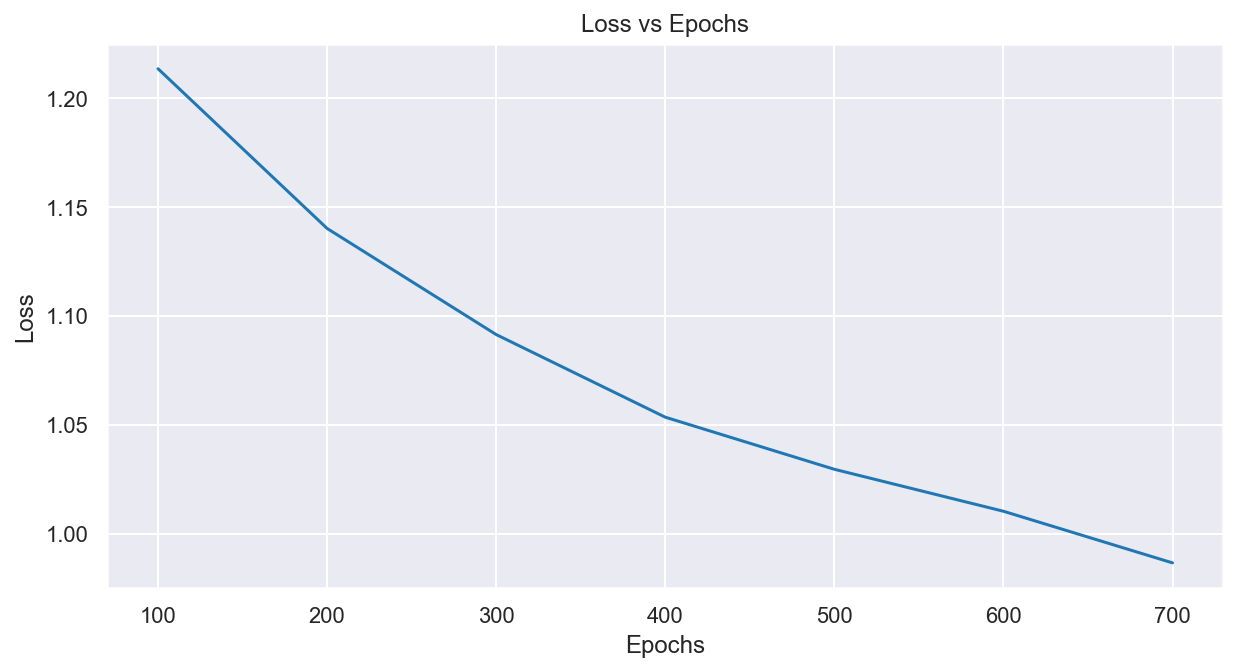

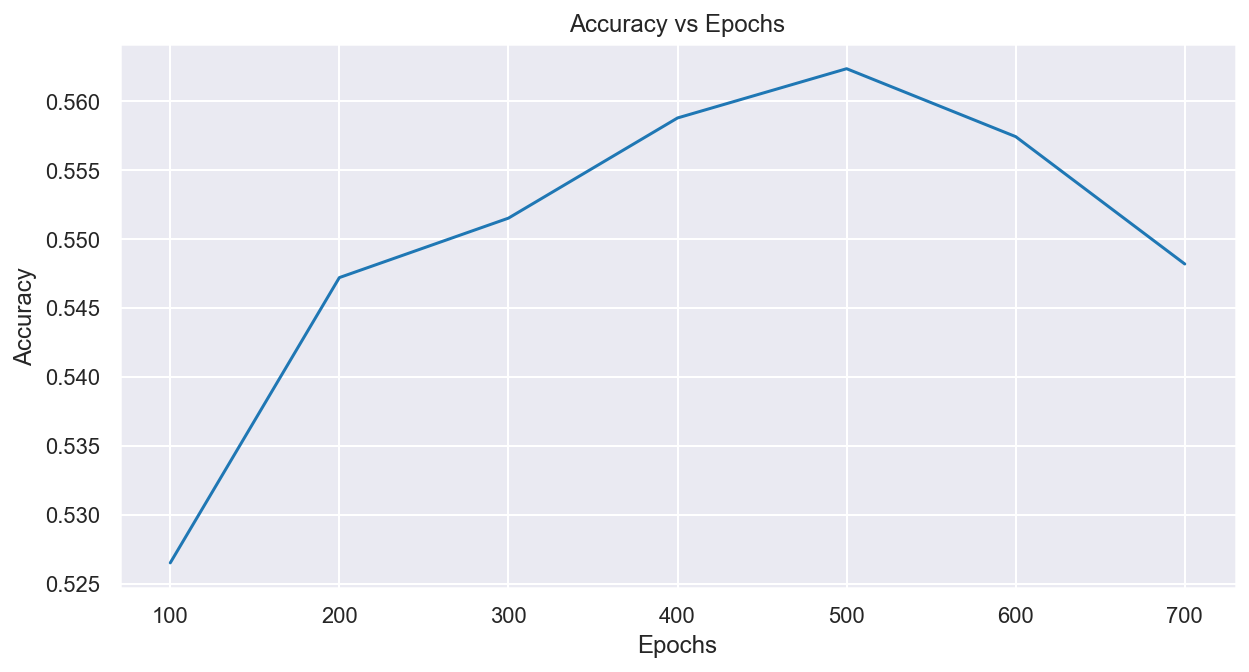

In [48]:
#Plot loss and accuracy graph
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(epochs_numbers, losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs_numbers, accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.show()

We observe that base on 3 layer neural network, epoch number 500 seems to be the most efficient in accuracy. Large epochs may result an mass overfitting of our dataset. Therefore, we decide to continue tuning this model with a fixed 500 epoch number. 

### Tune Learning Rate in NN

In [49]:
# Initialize the network, define the loss and the optimizer
net = MusicGenreNet(input_features, output_classes)
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(net.parameters(), lr=0.001)

#Train different learning rate
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:
    # Train the network for a certain number of epochs
    epochs_numbers = 500
    optimizer = optim.Adam(net.parameters(), lr=lr)
    for epoch in range(epochs_numbers):
        optimizer.zero_grad()
        outputs = net(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    # After each set of epochs, print out the loss and test accuracy
    with torch.no_grad():
        outputs = net(X_test)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test).float().mean()

C:\Users\Cyl20\AppData\Local\Temp/ipykernel_3356/2096314103.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\Cyl20\AppData\Local\Temp/ipykernel_3356/2096314103.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)


lr: 0.0001
Test Accuracy: 0.5199704170227051
lr: 0.0005
Test Accuracy: 0.5600345134735107
lr: 0.001
Test Accuracy: 0.557692289352417
lr: 0.005
Test Accuracy: 0.5588017702102661
lr: 0.01
Test Accuracy: 0.5551035404205322
lr: 0.05
Test Accuracy: 0.5504191517829895
lr: 0.1
Test Accuracy: 0.552391529083252
lr: 0.5
Test Accuracy: 0.5225591659545898


### Data Visualization

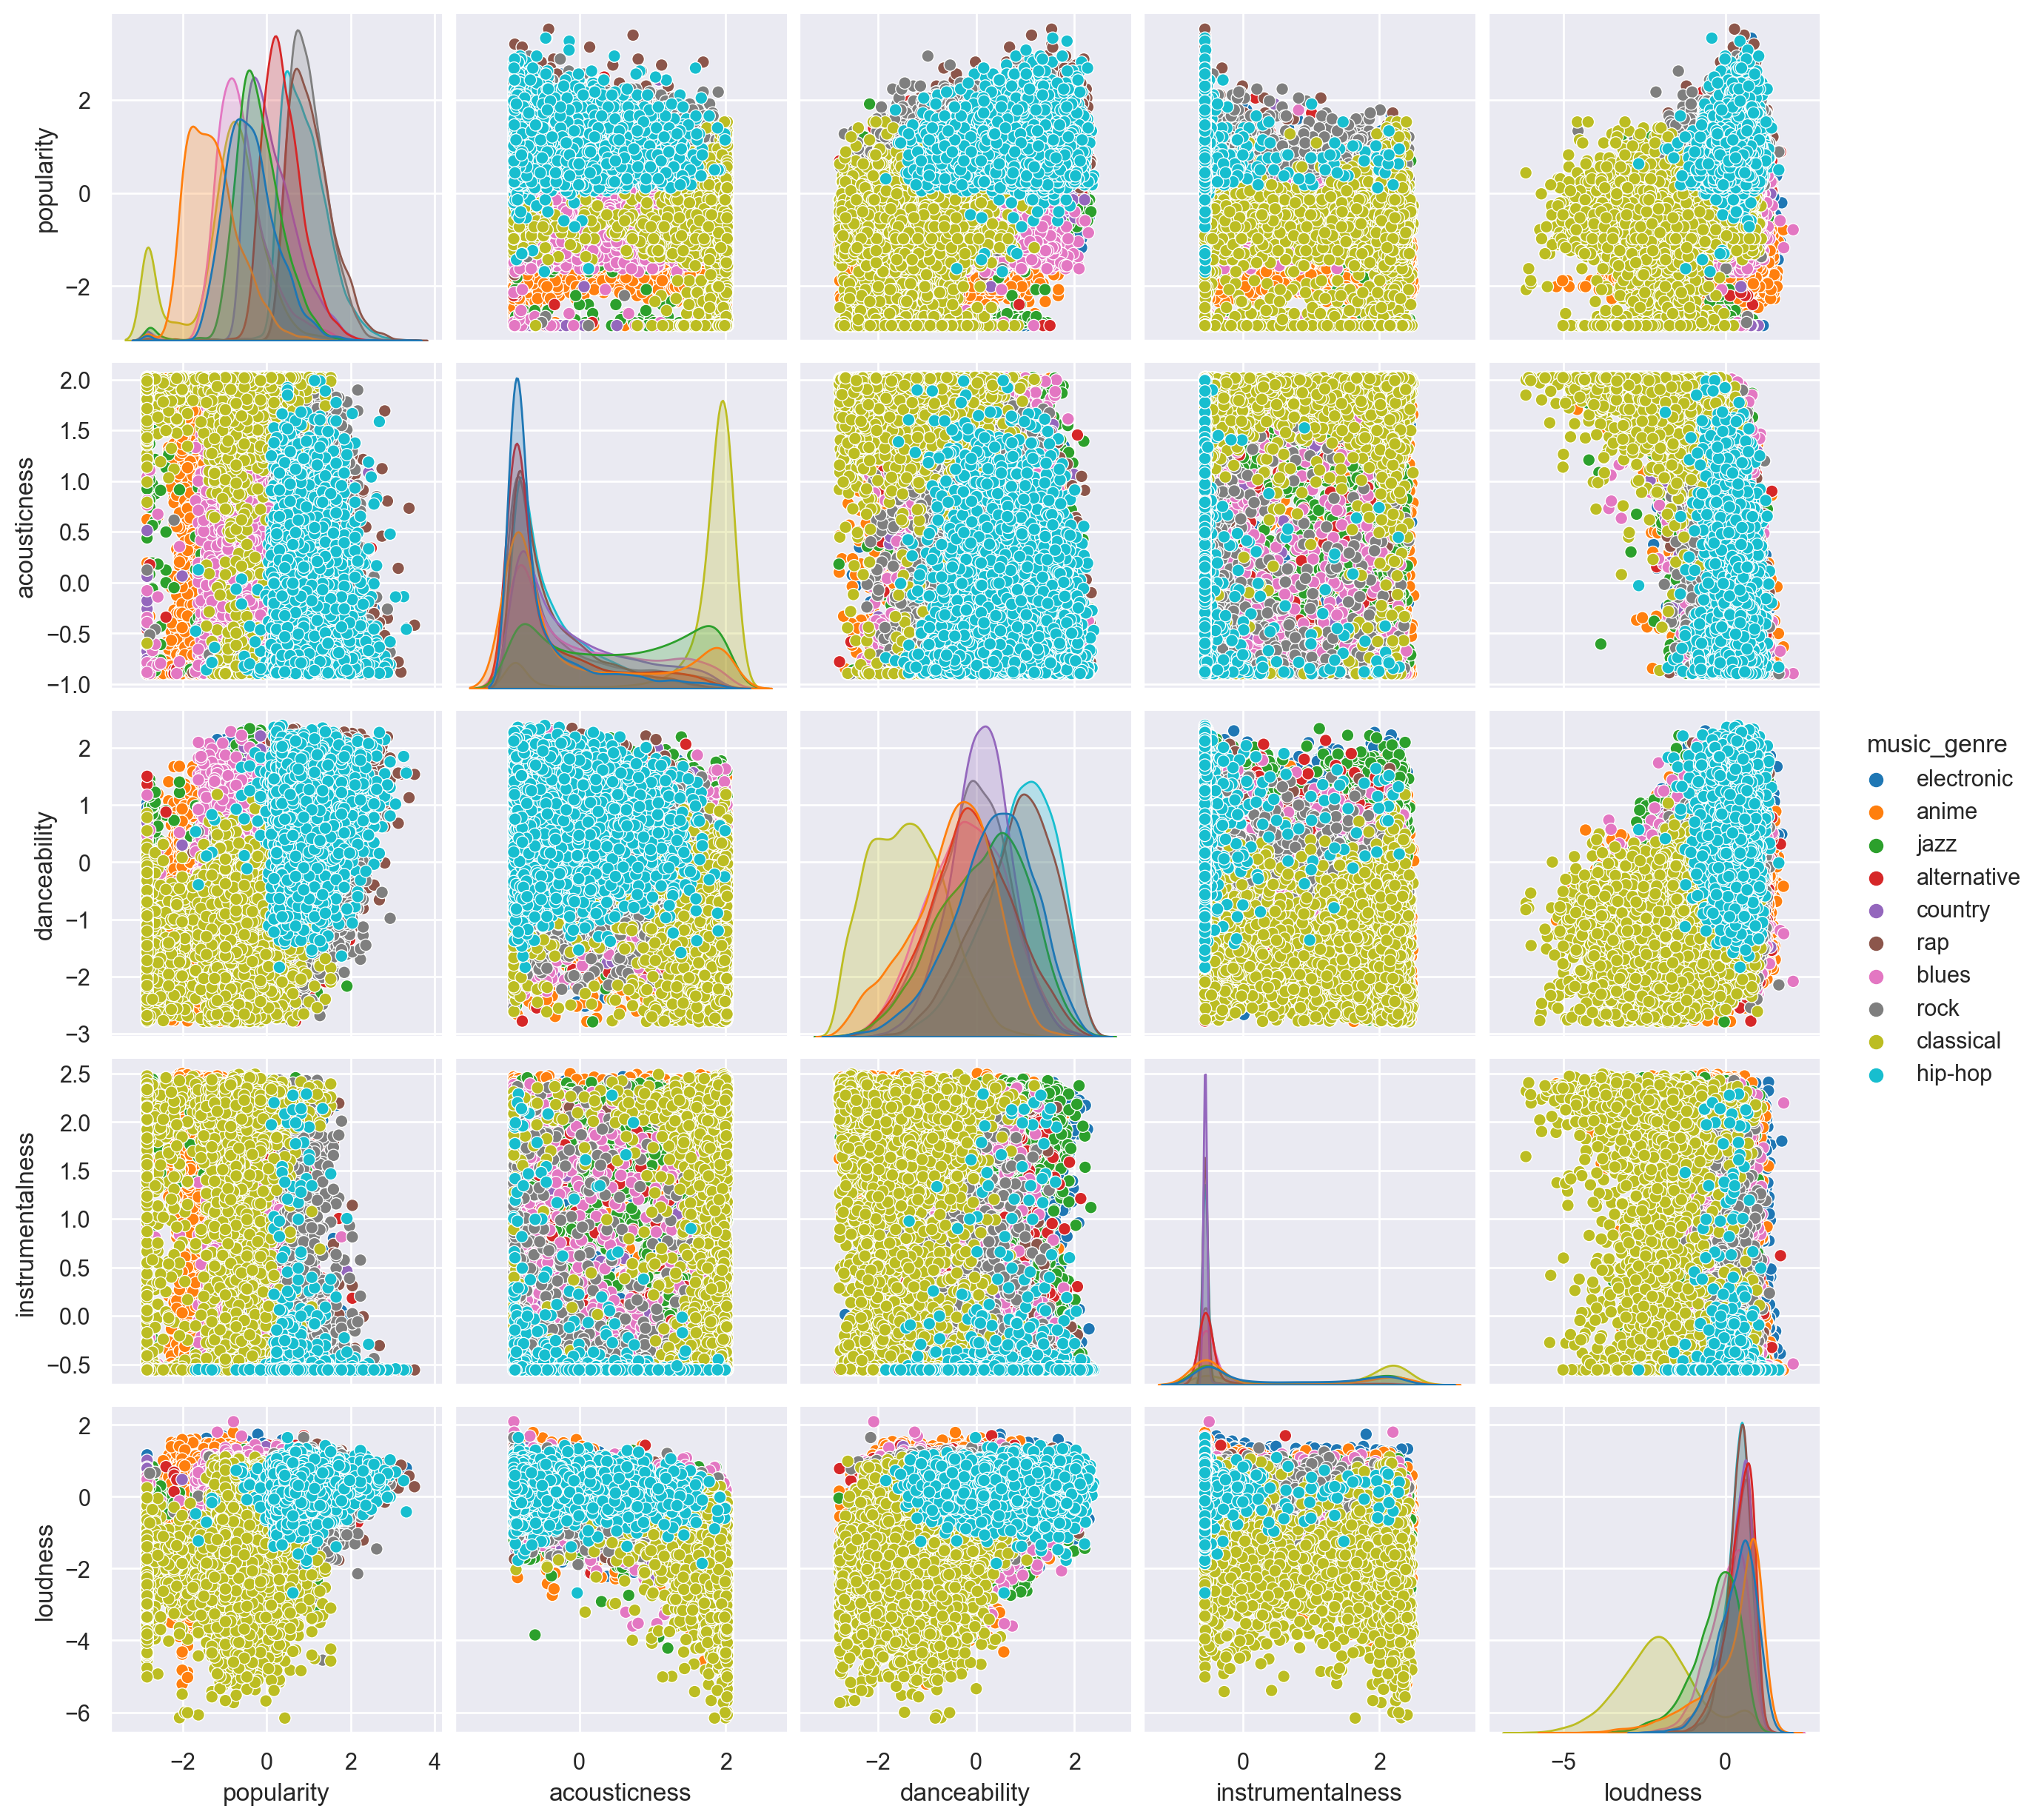

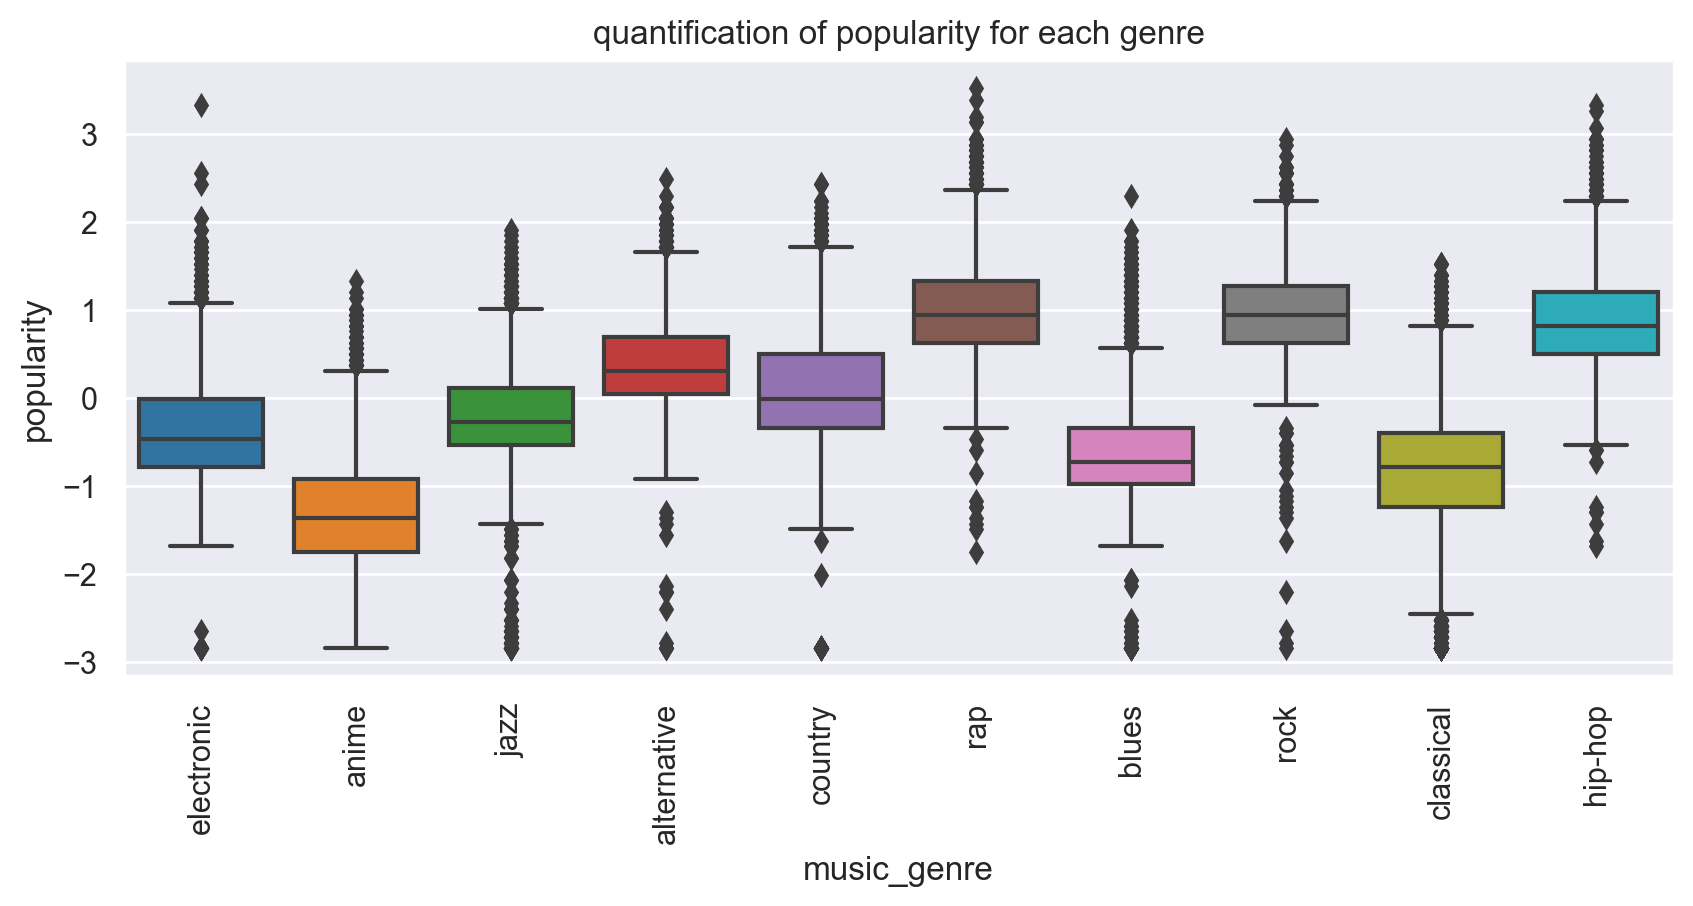

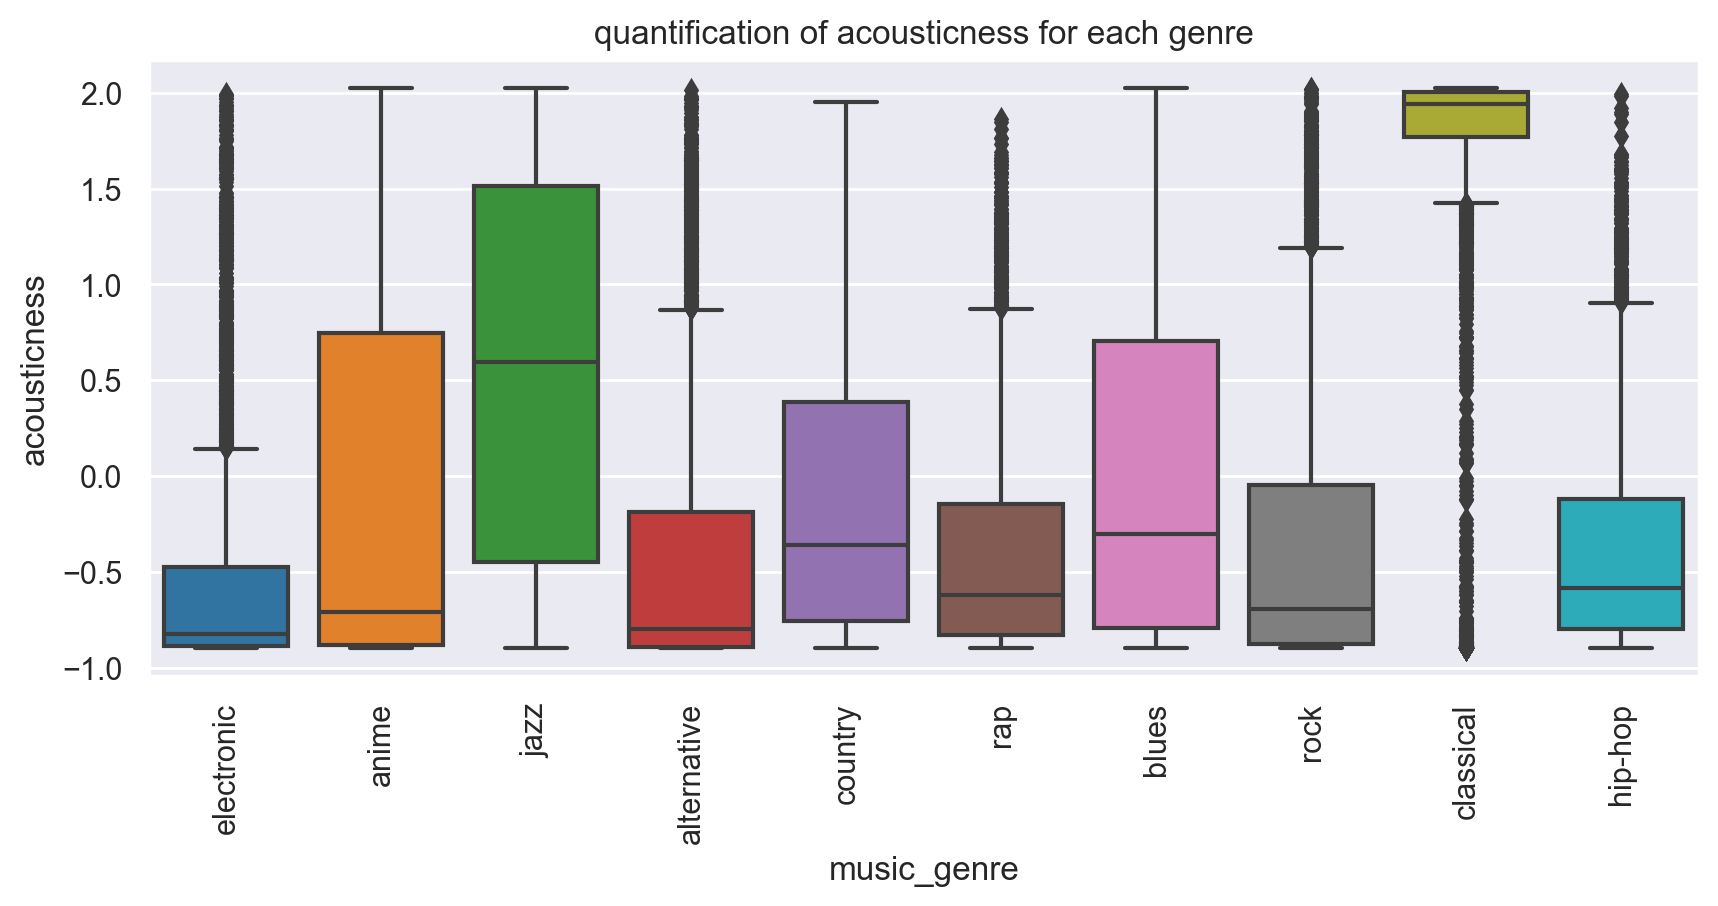

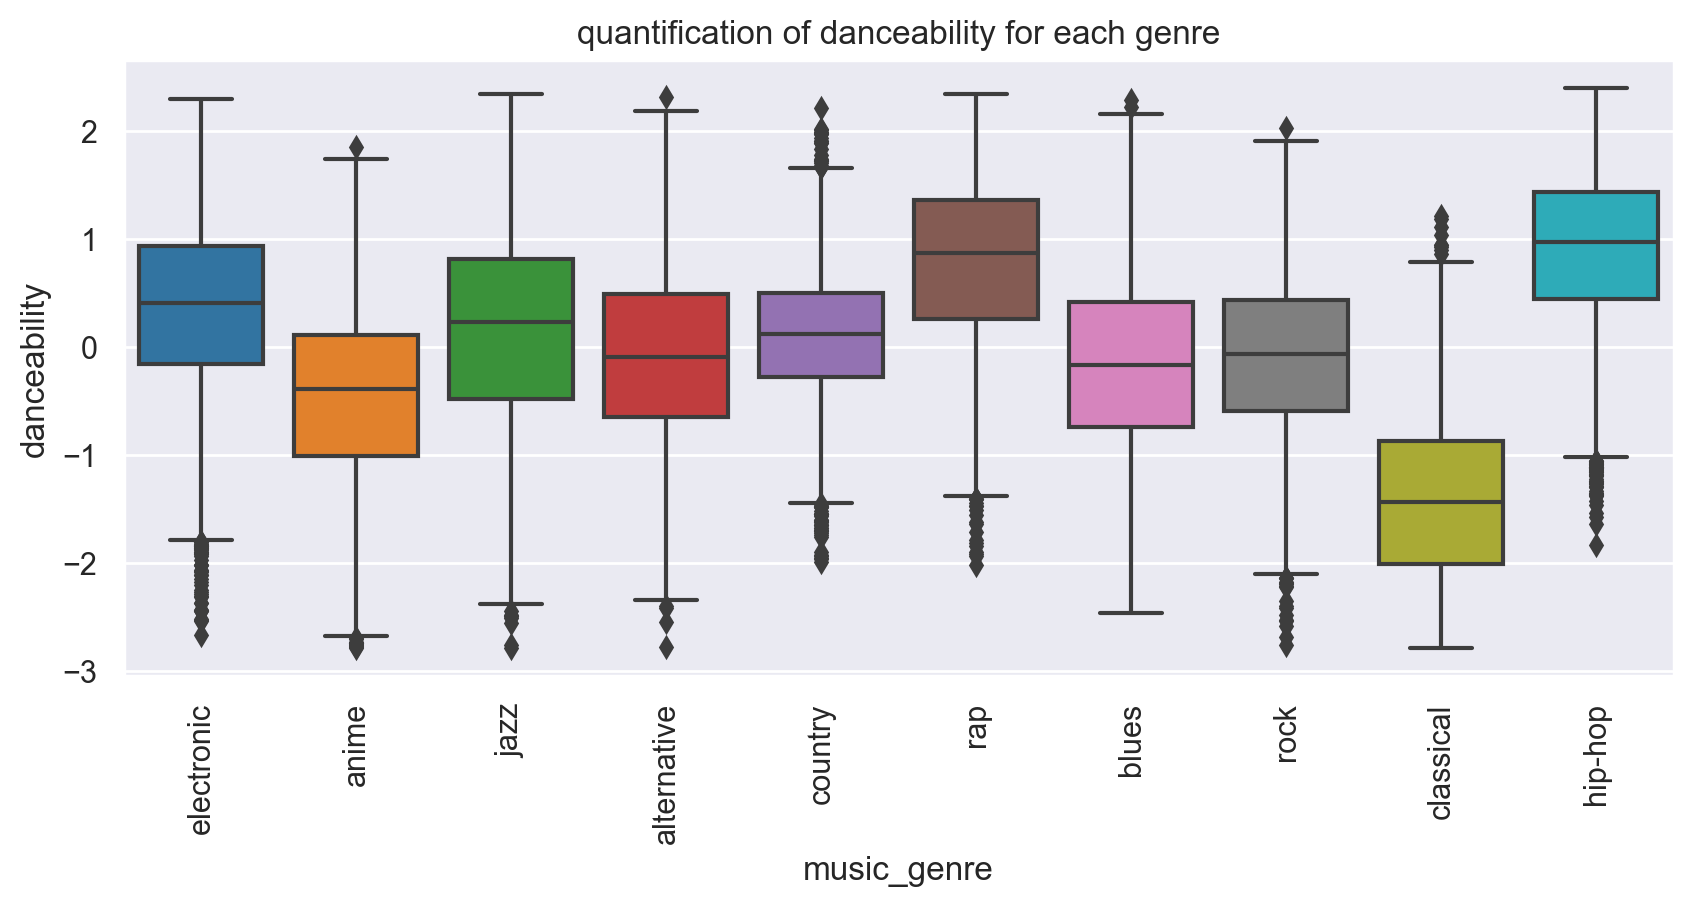

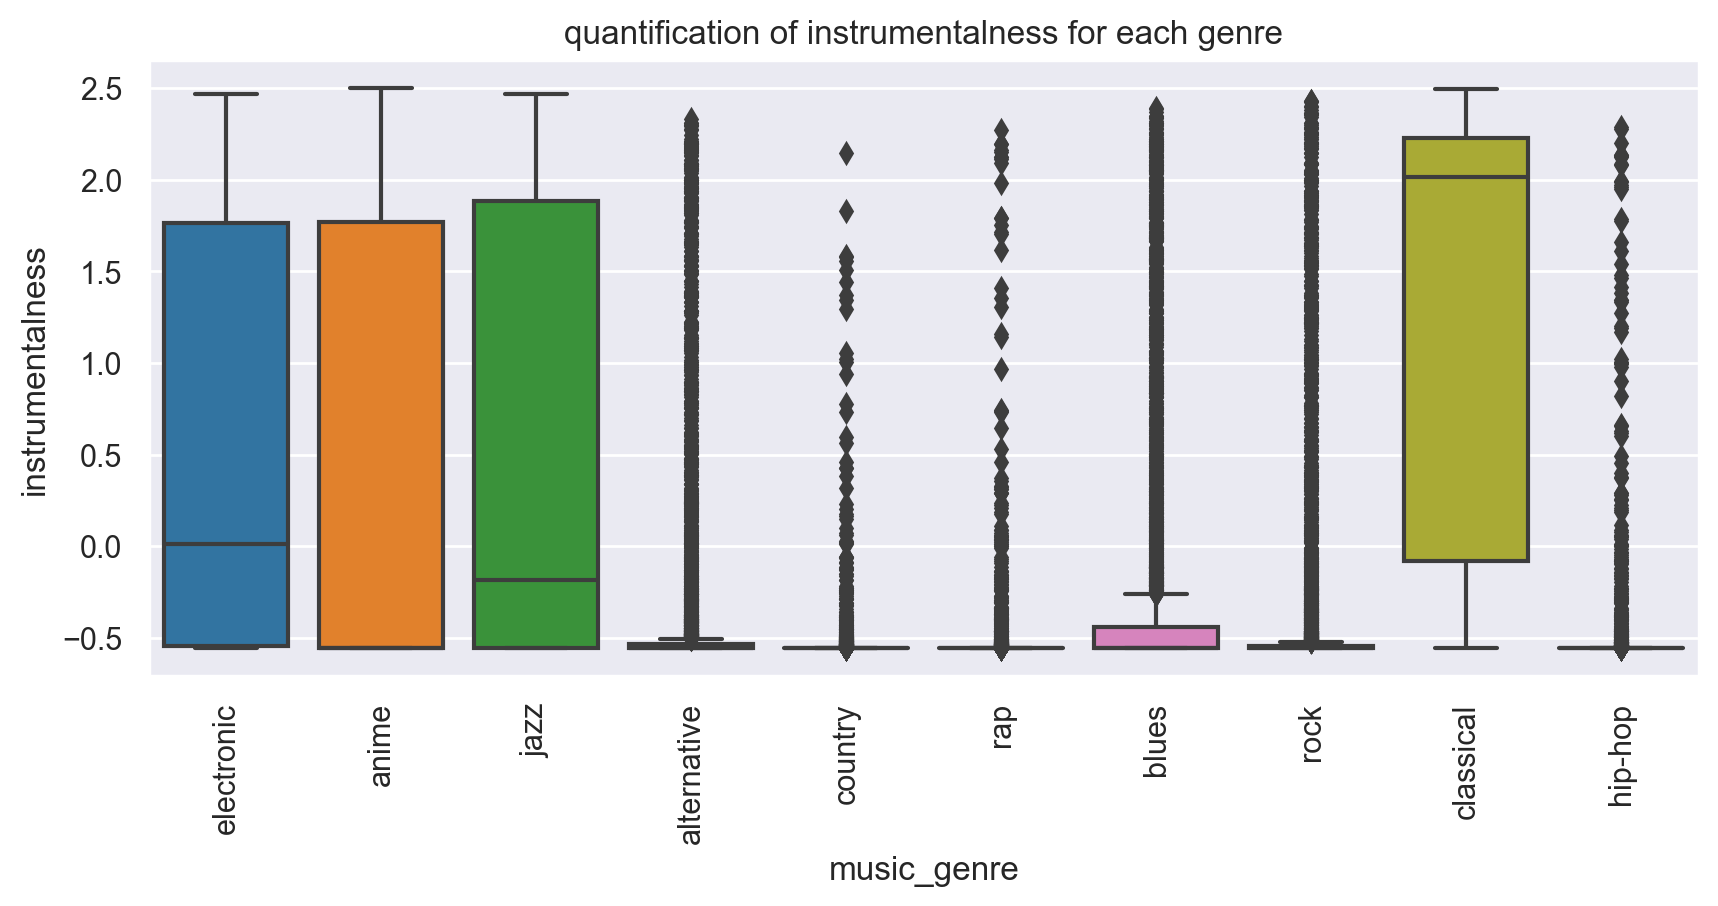

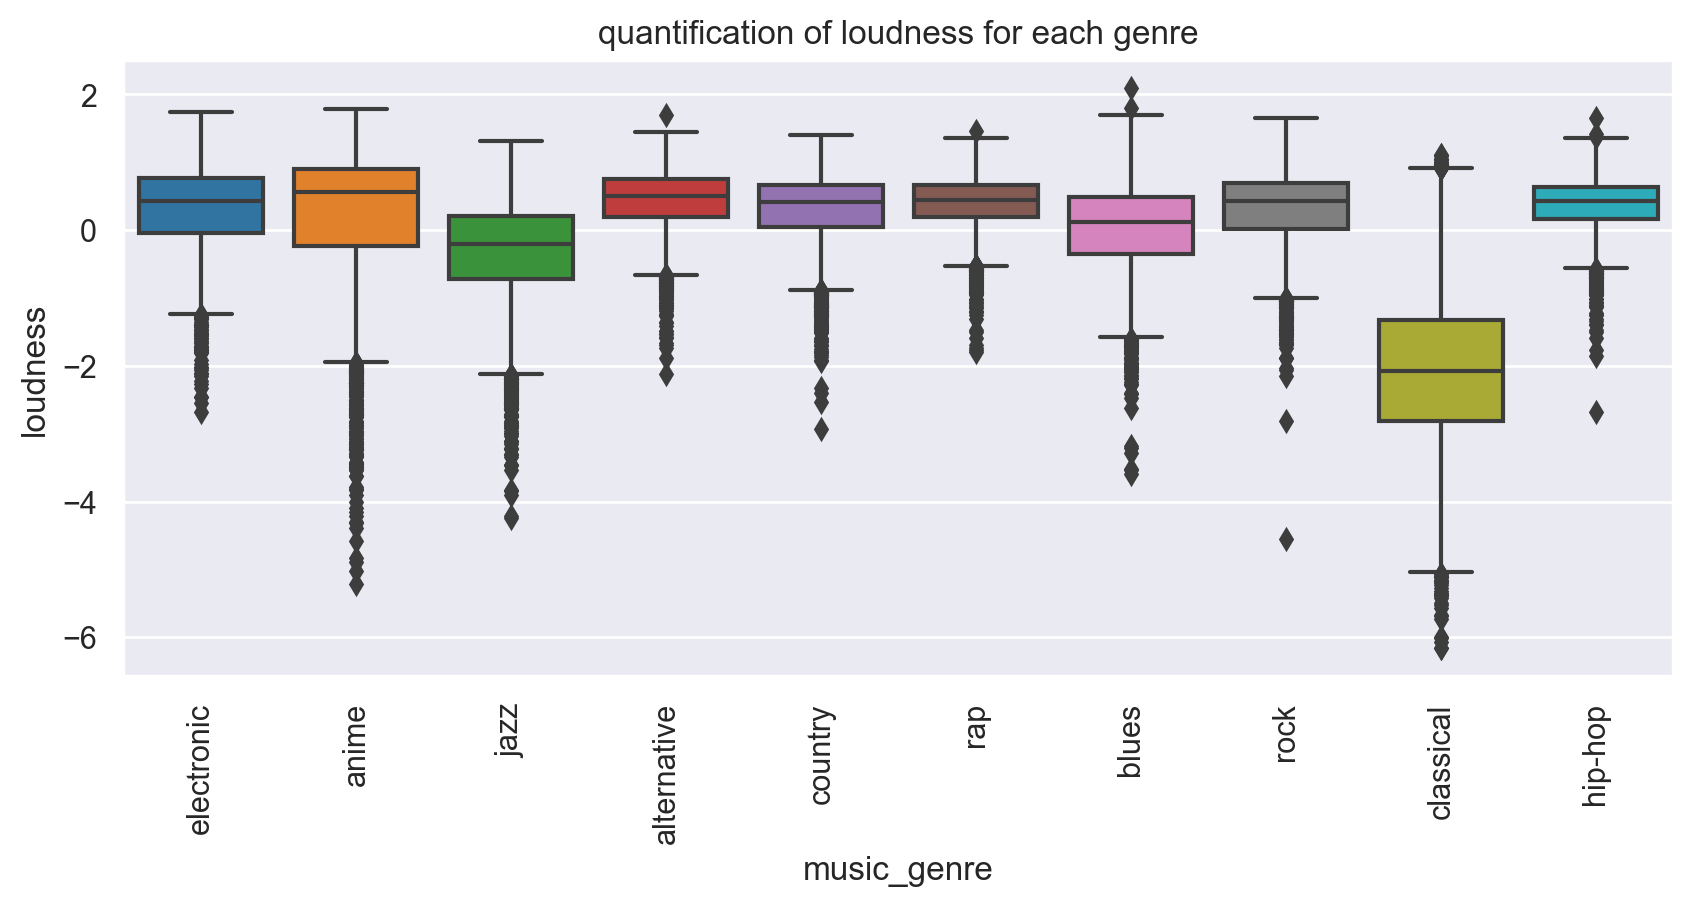

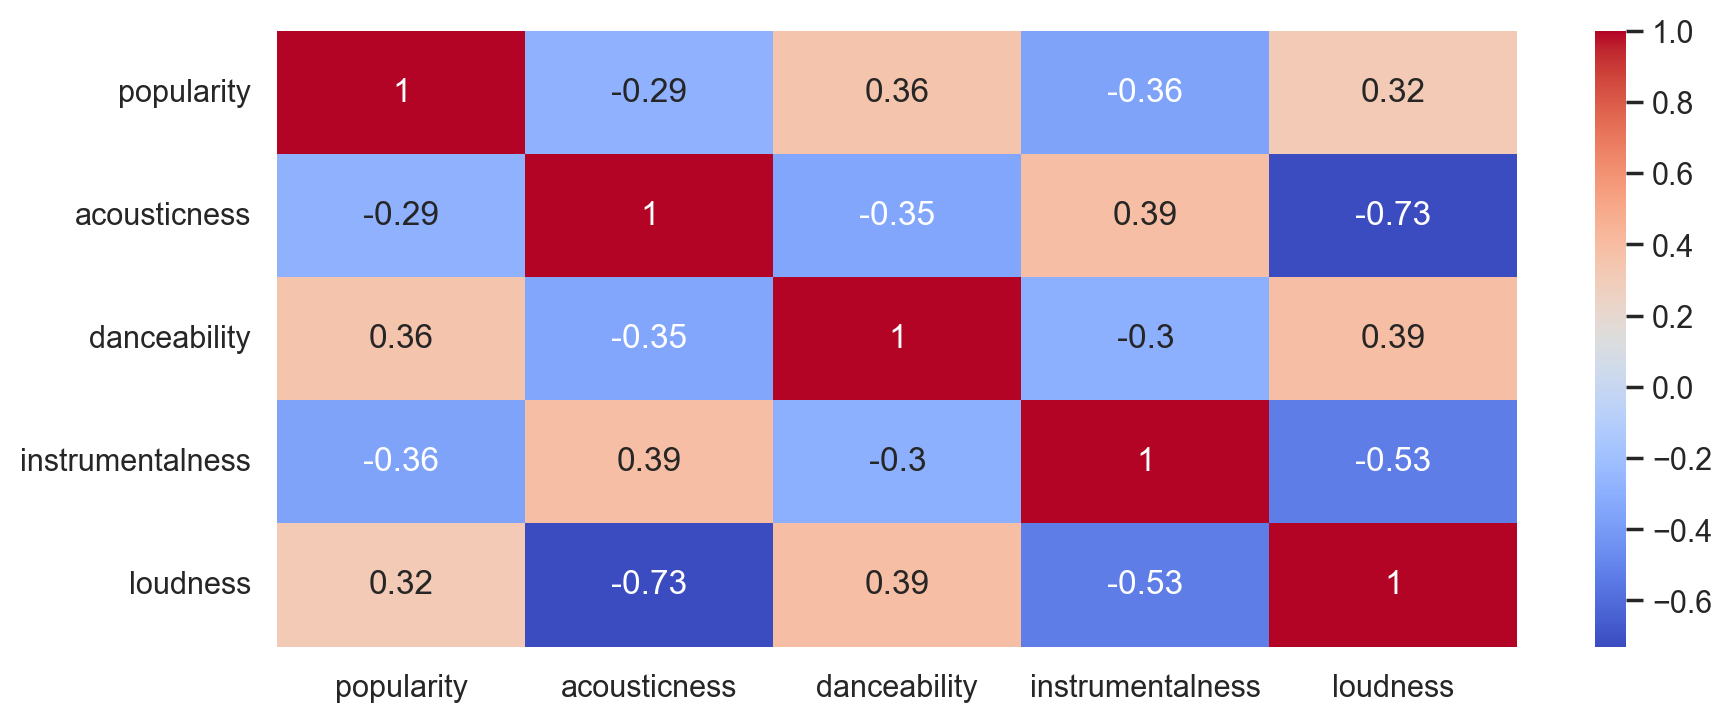

In [27]:
sns.pairplot(music_data[selected_feature_names + ['music_genre']], hue='music_genre')

for i in selected_feature_names:
    music_data[i] = pd.to_numeric(music_data[i], errors='coerce')
    plt.figure(figsize = (10,4))
    sns.boxplot(x = 'music_genre', y = i, data = music_data)
    plt.title(f'quantification of {i} for each genre')
    plt.xticks(rotation = 'vertical')
    plt.show()

plt.figure(figsize = (10,4))
selected_corr = music_data[selected_feature_names].corr()
sns.heatmap(selected_corr, annot = True, cmap = 'coolwarm')
plt.show()

# Ethics & Privacy

Data Permission & Privacy:
 The dataset: “Prediction of Music Genre” that we select is chosen from a public database website: Kaggle. Unlike other datasets that focus on human study, our chosen data collects only the description (artist name and track name, nothing on personal identities or ethnic background) and quantified structural information (popularity, duration, energy, key, etc.) of a variety of songs that are already posted online (collected through Spotify API); With the fact that it does not actually contain any of the song file, we eliminate all issues with regard to copyright and user privacy. Additionally, this particular dataset follows the CC0 1.0 Universal Public Domain Dedication, thus we have the right to use, modify and perform work on it. \

Potential Bias: 
 It is essential to notice that music genres are affected by various of aspects. Due to the limitation of variables in this dataset, we might not capture all the differences between genres to fully distinguish one from another and discover a feature bias. \
 
Implication:
 Since this model will only be used in this particular in-class project, we will interpret the result of our model in caution as for now, and we may keep researching and modifying the variables we use.


# Team Expectations 

* We expect each member to contribute equally during group discussion.
* We expect to conduct a thoughtful and sophisticated analysis to our data that leads to the best solution.
* We should respect each other’s idea.
* We expect to be unanimous on what we try to accomplish.
* We will thoroughly fulfill the timeline proposal.

# Project Timeline Proposal

UPDATE THE PROPOSAL TIMELINE ACCORDING TO WHAT HAS ACTUALLY HAPPENED AND HOW IT HAS EFFECTED YOUR FUTURE PLANS

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5.10  |  8 PM |  Read project instructions; brainstorm for topics  | Draft a timeline that works for everyone; decide topic | 
| 5.14  |  10 AM |  Do background research for topic | Discuss and pick a dataset related to music genre; draft project proposal | 
| 5.17  | 10 AM  | Finalize and submit project proposal | Assign group members to each specific part; discuss approach to solution  |
| 5.27  | 10 AM  | Data wrangling, analysis; Model training | Be ready to submit project checkpoint   |
| 6.9   | 8 PM  | Model Testing, selecting; Complete Analysis | Draft results; draft final project file |
| 6.14  | Before 11:59 PM  | Finish final project| Submit final project |

# Footnotes
<a name="ieee"></a>1.[^](#ieee):Music Genre Classification and Recommendation by Using ... - IEEE Xplore, ieeexplore.ieee.org/document/8554016. Accessed 17 May 2023. https://ieeexplore.ieee.org/document/8554016<br> 
<a name="ssrn"></a>2.[^](#ssrn): Dias, Jessica, et al. “Music Genre Classification &amp; Recommendation System Using CNN.” SSRN, 18 May 2022, papers.ssrn.com/sol3/papers.cfm?abstract_id=4111849.https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4111849 <br>
<a name="raghav"></a>3.[^](#raghav): Agrawal, Raghav. “Music Genre Classification Project Using Machine Learning Techniques.” Analytics Vidhya, 6 Apr. 2022, https://www.analyticsvidhya.com/blog/2022/03/music-genre-classification-project-using-machine-learning-techniques/.  <br>
<a name="hindawi"></a>4.[^](#hindawi): Zhang, Yezi. “Music Recommendation System and Recommendation Model Based on Convolutional Neural Network.” Mobile Information Systems, 12 May 2022, https://www.hindawi.com/journals/misy/2022/3387598/.  <br>
<a name="Lippens"></a>5.[^](#Lippens): Lippens, S., Martens, J.P, Leman, M., Baets, B., Meyer, H. A COMPARISON OF HUMAN AND AUTOMATIC MUSICAL GENRE CLASSIFICATION. *ResearchGate*. https://www.researchgate.net/publication/200806218_A_Comparison_of_Human_and_Automatic_Musical_Genre_Classification<br> 
